## Importação dos pacotes

In [1]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importar pacotes usados na seleção do modelo e na medição da precisão
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# importar os pacotes necessários para os algoritmos de classificação
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Carga dos dados de entrada

In [4]:
# carregar arquivo de dados de treino
data = pd.read_csv('iris-train.csv', index_col='Id')

# mostrar alguns exemplos de registros
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
47,5.1,3.8,1.6,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-setosa
79,6.0,2.9,4.5,1.5,Iris-versicolor
44,5.0,3.5,1.6,0.6,Iris-setosa


In [5]:
# definir dados de entrada

X = data.drop(['Species'], axis=1) # tudo, exceto a coluna alvo
y = data['Species'] # apenas a coluna alvo

print('Forma dos dados originais:', X.shape, y.shape)

Forma dos dados originais: (100, 4) (100,)


In [6]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
47,5.1,3.8,1.6,0.2
37,5.5,3.5,1.3,0.2
50,5.0,3.3,1.4,0.2
79,6.0,2.9,4.5,1.5
44,5.0,3.5,1.6,0.6


## Transformações nos dados

## Separação dos dados de treino e teste

In [7]:
# separar dados para fins de treino (70%) e de teste (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Forma dos dados separados:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train.head()

Forma dos dados separados: (70, 4) (30, 4) (70,) (30,)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
67,5.6,3.0,4.5,1.5
130,7.2,3.0,5.8,1.6
99,5.1,2.5,3.0,1.1
4,4.6,3.1,1.5,0.2
46,4.8,3.0,1.4,0.3


## Treinamento dos modelos preditivos

In [8]:
def evaluate_model_cv(model, X=X, y=y):
  kfold = KFold(n_splits=10, random_state=42)
  results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=1)
  score = results.mean() * 100
  stddev = results.std() * 100
  print(model, '\nCross-Validation Score: %.2f (%.2f) %%' % (score, stddev))
  return score

In [9]:
# faz o ajuste fino do modelo, calculando os melhores hiperparâmetros
def fine_tune_model(model, params, X=X, y=y):
  print('\nFine Tuning Model:')
  print(model, "\nparams:", params)

  kfold = KFold(n_splits=10, random_state=42)
  grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kfold, verbose=1)
  grid.fit(X, y)

  print('\nGrid Score: %.2f %%' % (grid.best_score_ * 100))
  print('Best Params:', grid.best_params_)
 
  return grid

# Avaliação e ajuste fino de cada modelo preditivo

In [10]:
# A) Logistic Regression
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500, C=10)
evaluate_model_cv(model)

params = {'solver':['liblinear', 'lbfgs'], 'C':np.logspace(-3,3,7)}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 
Cross-Validation Score: 98.00 (4.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished


In [11]:
# B) Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')
evaluate_model_cv(model)

params = {'criterion':['gini','entropy'], 'max_depth':[3,5,7,11]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best') 
Cross-Validation Score: 98.00 (4.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [72]:
# C) K-Nearest Neighbours
model = KNeighborsClassifier(n_neighbors=3)
evaluate_model_cv(model)

params = {'n_neighbors':[1, 3, 5, 7, 9]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform') 
Cross-Validation Score: 99.00 (3.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [14]:
# D) Support Vector Machine (SVM)
model = SVC(random_state=42, C=1, gamma=0.001, kernel='linear')
evaluate_model_cv(model)

params = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'rbf']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False) 
Cross-Validation Score: 99.00 (3.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [22]:
# E) Random Forest
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=100)
evaluate_model_cv(model)

params = {'n_estimators':[10, 50, 100, 500], 'max_features':['auto', 'sqrt', 'log2']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 
Cross-Validation Score: 97.00 (4.58) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.6s finished


In [34]:
# F) Stochastic Gradient Descent (SGD)
model = SGDClassifier(random_state=42, max_iter=100, tol=0.01)
evaluate_model_cv(model)

params = {'max_iter':[100, 200, 350, 500, 1000], 'tol':[0.1, 0.01]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.01,
       validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 78.00 (17.78) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [37]:
# G) Perceptron
model = Perceptron(random_state=42, max_iter=100, tol=0.01)
evaluate_model_cv(model)

params = {'max_iter':[100, 200, 350, 500, 1000], 'tol':[0.1, 0.01, 0.001]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.01,
      validation_fraction=0.1, verbose=0, warm_start=False) 
Cross-Validation Score: 76.00 (17.44) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [39]:
# H) Naïve Bayes
model = GaussianNB(priors=None, var_smoothing=1e-08)
evaluate_model_cv(model)

params = {'priors': [None], 'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(priors=None, var_smoothing=1e-08) 
Cross-Validation Score: 96.00 (4.90) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [51]:
# I) Linear SVM
model = LinearSVC(random_state=42, max_iter=1000, C=1)
evaluate_model_cv(model)

params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear faile

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0) 
Cross-Validation Score: 96.00 (4.90) %


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [55]:
# J) Ada Boost
model = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=1)
evaluate_model_cv(model)

params = {'n_estimators':[1,3,5,7,11]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=1, random_state=None) 
Cross-Validation Score: 98.00 (4.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [58]:
# K) Gradient Boosting
model = GradientBoostingClassifier(random_state=42, max_depth=5)
evaluate_model_cv(model)

'''
params = {
    "learning_rate":[0.01, 0.05, 0.1],
    "max_depth":[3, 5, 7],
    "max_features":["log2", "sqrt"],
    "criterion":["friedman_mse", "mae"],
    "subsample":[0.5, 0.75, 1.0],
}
'''

params = {'max_depth':[3, 5, 7]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 
Cross-Validation Score: 97.00 (4.58) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.5s finished


In [64]:
# M) Multi-Layer Perceptron (MLP)
model = MLPClassifier(random_state=42, solver='lbfgs', alpha=1, hidden_layer_sizes=(15,))
evaluate_model_cv(model)

params = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 
Cross-Validation Score: 99.00 (3.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished


In [66]:
# N) Linear Discriminant Analysis (LDA)
model = LinearDiscriminantAnalysis(solver='svd')
evaluate_model_cv(model)

params = {'solver':['svd', 'lsqr', 'eigen']}
#fine_tune_model(model, params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001) 
Cross-Validation Score: 98.00 (4.00) %


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


## Comparação final entre os algoritmos

In [87]:
models = []
models.append(('LR', LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500, C=10)))
models.append(('DT', DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM', SVC(random_state=42, C=1, gamma=0.001, kernel='linear')))
models.append(('RF', RandomForestClassifier(random_state=42, max_features='auto', n_estimators=100)))
models.append(('SGD', SGDClassifier(random_state=42, max_iter=100, tol=0.01)))
models.append(('NN', Perceptron(random_state=42, max_iter=100, tol=0.01)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=1e-08)))
models.append(('LSVM', LinearSVC(random_state=42, max_iter=1000, C=1)))
models.append(('ABDT', AdaBoostClassifier(DecisionTreeClassifier(random_state=42), n_estimators=1)))
models.append(('GB', GradientBoostingClassifier(random_state=42, max_depth=5)))
models.append(('MLP', MLPClassifier(random_state=42, solver='lbfgs', alpha=1, hidden_layer_sizes=(15,))))
models.append(('LDA', LinearDiscriminantAnalysis(solver='svd')))

In [79]:
results = []
names = []
scores = []
stddevs = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=42)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  scores.append(cv_results.mean() * 100)
  stddevs.append(cv_results.std() * 100)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.980000 (0.040000)
DT: 0.980000 (0.040000)
KNN: 0.990000 (0.030000)
SVM: 0.990000 (0.030000)
RF: 0.970000 (0.045826)
NB: 0.960000 (0.048990)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

LSVM: 0.960000 (0.048990)
ABDT: 0.970000 (0.045826)
GB: 0.970000 (0.045826)
MLP: 0.990000 (0.030000)
LDA: 0.980000 (0.040000)


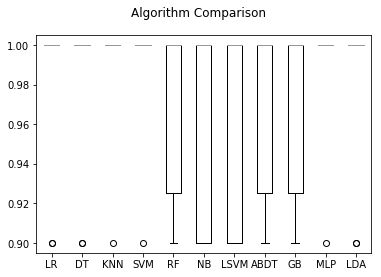

In [80]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
results = pd.DataFrame({'Model': names, 'Score': scores, 'Std Dev': stddevs})
results.sort_values(by='Score', ascending=False)

,Model,Score,Std Dev
2,KNN,99.0,3.000000
3,SVM,99.0,3.000000
9,MLP,99.0,3.000000
0,LR,98.0,4.000000
1,DT,98.0,4.000000
10,LDA,98.0,4.000000
4,RF,97.0,4.582576
7,ABDT,97.0,4.582576
8,GB,97.0,4.582576
5,NB,96.0,4.898979


## Verificação contra os dados reais (resultados esperados)

In [88]:
# carregar arquivo de dados de teste
test_data = pd.read_csv('iris-test.csv', index_col='Id')

# mostrar alguns exemplos de registros
test_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
72,6.1,2.8,4.0,1.3
78,6.7,3.0,5.0,1.7
139,6.0,3.0,4.8,1.8
135,6.1,2.6,5.6,1.4
27,5.0,3.4,1.6,0.4


In [89]:
# carregar arquivo de dados de teste
real_data = pd.read_csv('iris-solution.csv', index_col='Id')

# mostrar alguns exemplos de registros
real_data.head()

,Species
Id,
72,Iris-versicolor
78,Iris-versicolor
139,Iris-virginica
135,Iris-virginica
27,Iris-setosa


In [92]:
names = []
scores = []
for name, model in models:
  X_train, X_test, y_train, y_test = X, test_data, y, real_data

  # treinar o modelo
  model.fit(X_train, y_train)

  # calcular precisão (forma simples)
  score = model.score(X_test, y_test) * 100
  print(model, '\nModel Score: %.2f %%' % score)

  # exibir matriz de confusão
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix:\n', cm, '\n')
    
  names.append(name)
  scores.append(score)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 
Model Score: 92.00 %
Confusion Matrix:
 [[15  0  0]
 [ 0 15  2]
 [ 0  2 16]] 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best') 
Model Score: 86.00 %
Confusion Matrix:
 [[15  0  0]
 [ 0 13  4]
 [ 0  3 15]] 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform') 
Model Score: 94.00 %
Confusion Matrix:
 [[15  0  0]
 [ 0 15  2

/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 
Model Score: 90.00 %
Confusion Matrix:
 [[15  0  0]
 [ 0 15  2]
 [ 0  3 15]] 

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.

In [91]:
results = pd.DataFrame({'Model': names, 'Score': scores})
results.sort_values(by='Score', ascending=False)

,Model,Score
12,LDA,96.0
2,KNN,94.0
4,RF,94.0
8,LSVM,94.0
0,LR,92.0
3,SVM,92.0
11,MLP,92.0
9,ABDT,90.0
10,GB,90.0
7,NB,88.0
